**PROBLEM OVERVIEW:**
<br>
The Digit Recognizer is a multi-class classification problem. The data files train.csv and test.csv contain 28*28 pixels gray scale images.
We will approach the problem in six major steps: 
1. Dataset import and pre-processing
2. Designing CNN architecture
3. Training the networks
4. Predict on test dataset
5. Plotting necessary diagrams
6. Saving output

<br>
**1. DATASET IMPORT AND PRE-PROCESSING**

In [1]:
# Libraries
import pandas as pd
import numpy as np

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import itertools

import seaborn as sns

# Reading dataset
X =  pd.read_csv("../input/train.csv")
X_test_main =  pd.read_csv("../input/test.csv")

# Extract label info
y = X["label"]

X = X.drop(['label'],axis = 1)

# Reshape image matrix
X = X.values.reshape(-1, 28, 28, 1).astype('float32')
X_test_main = X_test_main.values.reshape(-1, 28, 28, 1).astype('float32')

y = y.values


Using TensorFlow backend.


In [2]:
# Input shape
X.shape

(42000, 28, 28, 1)

In [3]:
# Plot label info
#plt = sns.countplot(y)

**Sample train image plotting:**

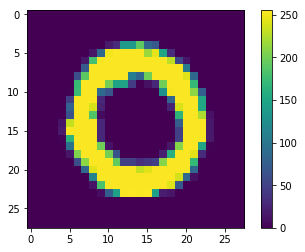

In [4]:
plt.figure()
plt.imshow( X[1][:,:,0])
plt.colorbar()
plt.grid(False)
plt.show()

**Data Normalization:**
<br>
The type of pixel value is integer and the range is in between 0 to 255. In order to convert the value 0 to 1 range, we will divide it by 255.

In [5]:
X = X / 255.0
X_test_main = X_test_main / 255.0

In [6]:
# Train and test dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y)

**2. DESIGNING CNN ARCHITECTURE**
<br>
The CNN architecture is designed using 3 convolution layers and 3 fully connected (FC) layers. The summary of the architecture is given bellow:
<br>
<br>
***CONV 1***
<br>
***MAX POOLING 1***
<br>
***NORMALIZATION 1***
<br>
<br>
***CONV 2***
<br>
***MAX POOLING 2***
<br>
***NORMALIZATION 2***
<br>
<br>
***CONV 3***
<br>
***MAX POOLING 3***
<br>
***NORMALIZATION 3***
<br>
<br>
***FC 1***
<br>
***FC 2***
<br>
***FC 3 (Softmax)***

In [7]:
model = Sequential()
    
# CONV 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", strides=(1,1), padding="valid"))
#model.add(Activation="relu")
# MAX POOL 1
model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1), padding="valid"))
# NORM 1
model.add(BatchNormalization())


# CONV 2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", strides=(1,1), padding="valid"))
#model.add(Activation="relu")
# MAX POOL 2
model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1), padding="valid"))
# NORM 2
model.add(BatchNormalization())


# CONV 3
model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", strides=(1,1), padding="valid"))
#model.add(Activation="relu")
# MAX POOL 3
model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1), padding="valid"))
# NORM 3
model.add(BatchNormalization())


# Flatten
model.add(Flatten())

# FC 1
model.add(Dense(units=512, activation="relu"))
#model.add(Dropout=0.2)

# FC 2
model.add(Dense(units=120, activation="relu"))
#model.add(Dropout=0.2)

# FC 3
model.add(Dense(units=10, activation = "softmax"))

**Compile the sequential model:**
<br>
The following hyper parameter values are used to compile the generated model.
<br>
<br>
learning rate=0.001<br>
weight decay=1e-6<br>
momentum=0.9

In [8]:
sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["sparse_categorical_accuracy"])

# ReduceLROnPlateau is a function from keras.callbacks.
# The following line of code reduces the learning rate by 0.5 if accuracy does not improve after 3 epochs.
lrr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

**3. TRAINING THE NETWORKS**
<br>
The following hyper parameter values are used to train the neural networks:
<br>
<br>
batch_size=40
<br>
epochs=20
<br>
verbose = 2
<br>
validation_split=0.25

In [9]:
# The following traing is based on splitted test and train dataset

result = model.fit(X_train, 
                   y_train, 
                   batch_size=70, 
                   epochs=20, 
                   verbose=2, 
                   validation_split=0.25, 
                   callbacks=[lrr],
                   shuffle=True)

'''
result = model.fit(X, 
                   y, 
                   batch_size=70, 
                   epochs=3, 
                   verbose=2, 
                   validation_split=0.25, 
                   callbacks=[lrr],
                   shuffle=True)
'''

Train on 28350 samples, validate on 9450 samples
Epoch 1/20
 - 213s - loss: 0.1163 - sparse_categorical_accuracy: 0.9648 - val_loss: 0.0574 - val_sparse_categorical_accuracy: 0.9829
Epoch 2/20


/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_sparse_categorical_accuracy,loss,sparse_categorical_accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 211s - loss: 0.0205 - sparse_categorical_accuracy: 0.9943 - val_loss: 0.0418 - val_sparse_categorical_accuracy: 0.9886
Epoch 3/20
 - 212s - loss: 0.0095 - sparse_categorical_accuracy: 0.9979 - val_loss: 0.0396 - val_sparse_categorical_accuracy: 0.9888
Epoch 4/20
 - 213s - loss: 0.0050 - sparse_categorical_accuracy: 0.9994 - val_loss: 0.0353 - val_sparse_categorical_accuracy: 0.9906
Epoch 5/20
 - 214s - loss: 0.0029 - sparse_categorical_accuracy: 0.9999 - val_loss: 0.0358 - val_sparse_categorical_accuracy: 0.9908
Epoch 6/20
 - 213s - loss: 0.0020 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0353 - val_sparse_categorical_accuracy: 0.9911
Epoch 7/20
 - 213s - loss: 0.0017 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0357 - val_sparse_categorical_accuracy: 0.9903
Epoch 8/20
 - 223s - loss: 0.0013 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0358 - val_sparse_categorical_accuracy: 0.9908
Epoch 9/20
 - 219s - loss: 0.0011 - sparse_categorical_accuracy: 1.0000 - val_lo

'\nresult = model.fit(X, \n                   y, \n                   batch_size=70, \n                   epochs=3, \n                   verbose=2, \n                   validation_split=0.25, \n                   callbacks=[lrr],\n                   shuffle=True)\n'

In [10]:
# Visualize model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 20, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       73856     
__________

**4. PREDICT ON TEST DATA**

In [11]:
y_pred = model.predict(X_test, verbose = 2)
#y_pred = model.predict(X_test_main, verbose = 2)

y_pred[:,0]

array([9.9998987e-01, 2.3385724e-11, 2.3172939e-08, ..., 4.8415590e-14,
       1.8553530e-08, 9.5875633e-01], dtype=float32)

In [12]:
# Loss and accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

4200/4200 [==============================] - 6s 2ms/step
Test accuracy: 0.9916666666666667


**5. PLOTTING**

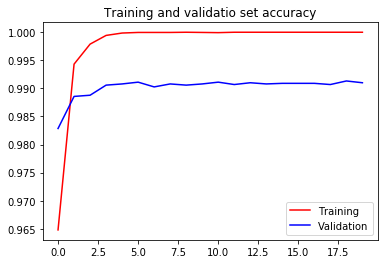

<Figure size 432x288 with 0 Axes>

In [13]:
# Plot training and validation accuracy
acc = result.history['sparse_categorical_accuracy']
val_acc = result.history['val_sparse_categorical_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training')
plt.plot(epochs, val_acc, 'b', label='Validation')
plt.title('Training and validatio set accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

**6. SAVE OUTPUT**

In [14]:
# Before saving output for submission, the model needs to be trained on the full training dataset (not splitted train dataset).
# Also the predict method needs to be run on X_test_main dataset.
y_pred = np.argmax(y_pred,axis = 1)
y_pred = pd.Series(y_pred,name="Label")
s = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred],axis = 1)
s.to_csv("output.csv",index=False)